In [1]:
import pandas as pd
import json
from superlinked import framework as sl
import sys
sys.path.append('../code/')
from utills import load_data, build_superlinked_app

2025-04-08 04:19:06.773 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [3]:
#load food_db
food_df = pd.read_parquet('../data/sr_legacy_food_db_clean.parquet')

In [10]:
food_df['food_category'].unique()§

array(['Baked Products', 'Snacks', 'Sweets',
       'Vegetables and Vegetable Products',
       'American Indian/Alaska Native Foods', 'Restaurant Foods',
       'Beverages', 'Fats and Oils', 'Sausages and Luncheon Meats',
       'Dairy and Egg Products', 'Baby Foods', 'Poultry Products',
       'Pork Products', 'Breakfast Cereals',
       'Legumes and Legume Products', 'Finfish and Shellfish Products',
       'Fruits and Fruit Juices', 'Cereal Grains and Pasta',
       'Nut and Seed Products', 'Beef Products',
       'Meals, Entrees, and Side Dishes', 'Fast Foods',
       'Spices and Herbs', 'Soups, Sauces, and Gravies',
       'Lamb, Veal, and Game Products'], dtype=object)

In [13]:
food_categories_subset = ['Baked Products', 'Snacks', 'Sweets',
       'Vegetables and Vegetable Products',
       'Beverages', 'Fats and Oils', 'Sausages and Luncheon Meats',
       'Dairy and Egg Products', 'Poultry Products',
       'Pork Products', 'Breakfast Cereals',
       'Legumes and Legume Products', 'Finfish and Shellfish Products',
       'Fruits and Fruit Juices', 'Cereal Grains and Pasta',
       'Nut and Seed Products', 'Beef Products',
       'Lamb, Veal, and Game Products']

food_df = food_df[food_df['food_category'].isin(food_categories_subset)]
# ... existing code ...

# Sample 20 rows from each food category
sampled_df = food_df.groupby('food_category').apply(lambda x: x.sample(n=20)).reset_index(drop=True)

# ... existing code ...

/tmp/ipykernel_2974477/3245808557.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = food_df.groupby('food_category').apply(lambda x: x.sample(n=20)).reset_index(drop=True)


In [15]:
sampled_df[['fdc_id', 'description', 'food_category', 'calories']].to_parquet('../data/sampled_food_db.parquet')

In [19]:
['peppers', 'chicken', 'mixed seeds', 'salmon']

['peppers', 'chicken', 'mixed seeds', 'salmon']

In [18]:
sampled_df.sample(20)


,fdc_id,description,food_category,calories,Protein,carbohydrates,fat
191,172488,"Lamb, leg, sirloin half, separable lean and fa...","Lamb, Veal, and Game Products",272.0,16.94,0.00,22.11
260,171477,"Chicken, broilers or fryers, breast, meat only...",Poultry Products,165.0,31.02,0.00,3.57
305,167545,"Snacks, granola bars, soft, coated, milk choco...",Snacks,466.0,5.80,63.80,24.90
242,168256,"Pork, fresh, shoulder, arm picnic, separable l...",Pork Products,235.0,24.88,0.00,14.33
250,168328,"Pork, cured, ham and water product, whole, bon...",Pork Products,116.0,14.07,4.22,4.86
127,171011,"Shortening, household, soybean (partially hydr...",Fats and Oils,884.0,0.00,0.00,100.00
144,175178,"Fish, cod, Pacific, cooked",Finfish and Shellfish Products,84.0,20.42,0.00,0.25
188,175298,"Game meat, boar, wild, cooked, roasted","Lamb, Veal, and Game Products",160.0,28.30,0.00,4.38
88,169723,"Wheat flour, white, cake, enriched",Cereal Grains and Pasta,362.0,8.20,78.03,0.86
114,171250,"Cheese, roquefort",Dairy and Egg Products,369.0,21.54,2.00,30.64


In [2]:
df = load_data()
app, index, food_item, description_space, food_category_text_space, food_category_categorical_space, energy_space = build_superlinked_app(df)


2025-04-07 17:08:13.901 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-07 17:08:13.902 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 17:08:14.004 
  command:

    streamlit run /home/ec2-user/projects/PhenoDS/superlinked_demo/venv/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-07 17:08:14.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 17:08:14.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 17:08:14.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 17:08:14.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [3]:
#load food_db
food_df = pd.read_parquet('../data/sr_legacy_food_db.parquet')
df = food_df.sample(1000)
categories = food_df.food_category.drop_duplicates().to_list()
nutrients_cols = ['Energy', 'Protein', 'Carbohydrate, by difference','Total lipid (fat)' ]



In [4]:
# -------------------------------
# 1. Define data schema
# -------------------------------
class FoodItem(sl.Schema):
    fdc_id : sl.IdField                   # Unique food identifier
    description : sl.String               # Full name of the food
    food_category : sl.String             # Category (e.g. 'dairy', 'fruit')
    Energy : sl.Float                     # Energy in kcal per 100g
    Protein : sl.Float                    # Protein in grams per 100g

# -------------------------------
# 2. Create schema instance and vector/numeric spaces
# -------------------------------
food_item = FoodItem()

# Semantic similarity over food name
description_space = sl.TextSimilaritySpace(text=food_item.description, model="all-MiniLM-L6-v2")

# Semantic similarity over food category text
food_category_text_space = sl.TextSimilaritySpace(text=food_item.food_category, model="all-MiniLM-L6-v2")

# Exact/category-level similarity (discrete match)
food_category_categorical_space = sl.CategoricalSimilaritySpace(
    category_input=food_item.food_category,
    categories=categories
)

# Numeric similarity for energy (kcal), similar mode
energy_space = sl.NumberSpace(
    food_item.Energy,
    min_value=0,
    max_value=1000,
    mode=sl.Mode.SIMILAR
)

# -------------------------------
# 3. Build index using all defined spaces
# -------------------------------
index = sl.Index([
    description_space,
    food_category_text_space,
    food_category_categorical_space,
    energy_space
])

# -------------------------------
# 4. Build various query types
# -------------------------------

# Basic semantic search using description only
query = (
    sl.Query(index)
    .find(food_item)
    .similar(description_space, sl.Param("query_text"))
    .select_all()
)

# Weighted search using description + food category (text-based)
weighted_query = (
    sl.Query(
        index,
        weights={
            description_space: sl.Param("desc_weight"),
            food_category_text_space: sl.Param("cat_weight")
        }
    )
    .find(food_item)
    .similar(description_space, sl.Param("query_text"))
    .similar(food_category_text_space, sl.Param("query_text"))
    .select_all()
)

# Search by matching discrete category (e.g. "Dairy and Egg Products")
categorical_query = (
    sl.Query(index)
    .find(food_item)
    .similar(food_category_categorical_space.category, sl.Param("query_categories"))
    .select_all()
)

# Search by numeric energy value (e.g. similar to 250 kcal)
number_query = (
    sl.Query(index)
    .find(food_item)
    .similar(energy_space, sl.Param("energy intake per 100g"))
    .select_all()
)

# -------------------------------
# 5. Create in-memory data source and executor
# -------------------------------
source = sl.InMemorySource(food_item)

# Define executor using source and index
executor = sl.InMemoryExecutor(sources=[source], indices=[index])

# Launch app with executor
app = executor.run()


## Inserting food database into source

In [5]:
# Insert the sampled data into the source
source.put(
    df[["fdc_id", "description", "food_category", "Energy"]].to_dict(orient="records")
)


Categorial query

In [6]:

category_query = categories[3]
result = app.query(
    categorical_query,
    query_categories=['Fruits and Fruit Juices']
)

result = sl.PandasConverter.to_pandas(result)
food_category_result = result[result.similarity_score ==1]
food_category_result.head(10)

,description,food_category,Energy,id,similarity_score
0,"Apricots, dried, sulfured, uncooked",Fruits and Fruit Juices,241.0,173941,1.0
1,"Cranberry juice, unsweetened",Fruits and Fruit Juices,46.0,168117,1.0
2,"Strawberries, canned, heavy syrup pack, solids...",Fruits and Fruit Juices,92.0,168172,1.0
3,"Naranjilla (lulo) pulp, frozen, unsweetened",Fruits and Fruit Juices,25.0,167790,1.0
4,"Soursop, raw",Fruits and Fruit Juices,66.0,167761,1.0
5,"Apricots, canned, extra heavy syrup pack, with...",Fruits and Fruit Juices,96.0,171701,1.0
6,"Cranberry sauce, jellied, canned, OCEAN SPRAY",Fruits and Fruit Juices,160.0,167804,1.0
7,"Persimmons, japanese, raw",Fruits and Fruit Juices,70.0,169941,1.0
8,"Limes, raw",Fruits and Fruit Juices,30.0,168155,1.0
9,"Pears, dried, sulfured, uncooked",Fruits and Fruit Juices,262.0,169121,1.0


Weighted queries

In [7]:

result = app.query(
    weighted_query,
    query_text="apple pie",
    desc_weight=2,
    cat_weight= 0
)

results_df = sl.PandasConverter.to_pandas(result)


/home/ec2-user/projects/PhenoDS/superlinked_demo/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/projects/PhenoDS/superlinked_demo/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


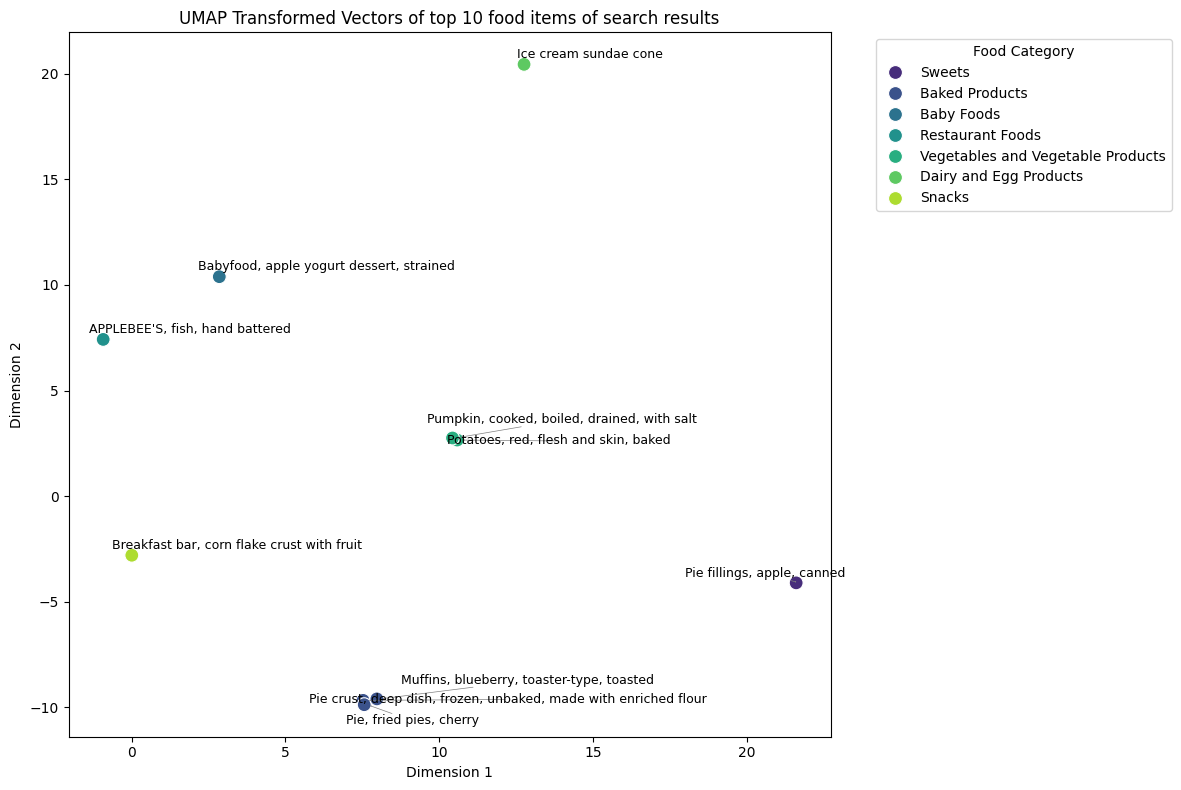

In [ ]:


# Call the function with umap_df
plot_umap_scatter(umap_df)

In [31]:
§

ValueError: columns overlap but no suffix specified: Index(['description', 'food_category'], dtype='object')

In [30]:
umap_df 

,dimension_1,dimension_2,description,food_category
170652,-6.612054,-9.411311,"Snacks, rice cakes, brown rice, sesame seed, u...",Snacks
170617,5.388686,8.914353,"Beef, chuck, blade roast, separable lean and f...",Beef Products
171513,17.061478,5.736054,"Chicken patty, frozen, cooked",Poultry Products
174702,5.119866,8.031106,"Beef, ribeye filet, boneless, separable lean o...",Beef Products
174798,-6.716678,-9.703553,"Snacks, candy bits, yogurt covered with vitamin C",Snacks
...,...,...,...,...
173837,22.633459,-10.743106,"Veal, shoulder, blade, separable lean and fat,...","Lamb, Veal, and Game Products"
168978,6.899105,23.727354,Ascidians (tunughnak) (Alaska Native),American Indian/Alaska Native Foods
175011,-3.150708,-8.154969,"Pie, apple, commercially prepared, enriched flour",Baked Products
168875,2.252450,-1.522111,"Rice, brown, medium-grain, cooked (Includes fo...",Cereal Grains and Pasta


Numeric querying

In [6]:
numeric_query = (
    sl.Query(index,
               weights={
            description_space: sl.Param("desc_weight"),
            energy_space: sl.Param("energy_weight")
        }
    )
    .find(food_item)
    .similar(description_space, sl.Param("query_text"))
    .similar(energy_space, sl.Param("energy_intake_per_100g"))
    .select_all()
)

result = app.query(
    numeric_query,
    query_text="apple",
    energy_intake_per_100g= 50,
    desc_weight= 10000,
    energy_weight= 1
)

sl.PandasConverter.to_pandas(result).head(30)




,description,food_category,Energy,id,similarity_score
0,"Mammy-apple, (mamey), raw",Fruits and Fruit Juices,51.0,169909,0.327652
1,"APPLEBEE'S, chicken tenders platter",Restaurant Foods,297.0,169841,0.318787
2,"McDONALD'S, BIG MAC (without Big Mac Sauce)",Fast Foods,234.0,172067,0.312221
3,"Babyfood, fruit, apple and raspberry, strained",Baby Foods,58.0,171345,0.304024
4,"APPLEBEE'S, 9 oz house sirloin steak",Restaurant Foods,189.0,169831,0.293721
5,"Apples, raw, granny smith, with skin (Includes...",Fruits and Fruit Juices,58.0,168203,0.284398
6,"Babyfood, apples, dices, toddler",Baby Foods,50.0,173511,0.282311
7,"Blackberry juice, canned",Fruits and Fruit Juices,38.0,173947,0.275211
8,"Applesauce, canned, sweetened, without salt",Fruits and Fruit Juices,68.0,171696,0.274671
9,"APPLEBEE'S, mozzarella sticks",Restaurant Foods,316.0,169011,0.270066
